# **CHAP3 Keras**

## **1. 딥러닝 준비**

* 케라스 : 프랑스 엔지니어인 프랑소와 숄레가 만든 고수준의 딥러닝 라이브러리
  * GPU연산을 수행하는 기능을 직접 실행하지 않고 텐서플로, CNTK, Theano, MXNet 등의 백엔드 엔진을 지정하여 사용

### 1) 주요 용어

#### (1) 하이퍼파라미터
  * 머신러닝 모델을 훈련할 떄 사용자가 직접 설정해주는 설정값
  * 사용자가 설정하는 하이퍼 파라미터에 따라 모델의 성능 및 결과가 달라짐
  * 하이퍼 파라미터 튜닝 : 하이퍼파라미터의 값을 조절
  * 딥러닝 프로젝트를 실행하는 초기 단계에 많은 시간을 튜닝에 투자하는 것 보다 마지막 단계에 진행하는 것을 추천


#### (2) 과소적합vs과대적합
  * train set / test set
  * 예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나, 혹은 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있을 경우 모델의 성능이 떨어질 수 있음
  * 과소적합 : 모델이 충분히 학습되지 않아 모델의 성능이 떨어짐
  * 과대적합 : 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태 > 노이즈까지 학습
  * 과소적합과 과대적합 문제를 최소화하면서 정확도를 가장 높일 수 있도록 해야 함

#### (3) 에포크
  * 딥러닝 모델이 반복 훈련을 할 떄 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프


#### (4) 손실 함수
  * 예측 값과 정잡 값의 오차
  * 사용자가 정의
  * 클래스 및 함수 형태로 정의되어 있는 손실함수를 지정하여 사용

In [86]:
import tensorflow as tf

tf.keras.losses.BinaryCrossentropy()
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

#### (5) 경사하강법
  * 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법
  * 경사하강법 구현(Numpy)

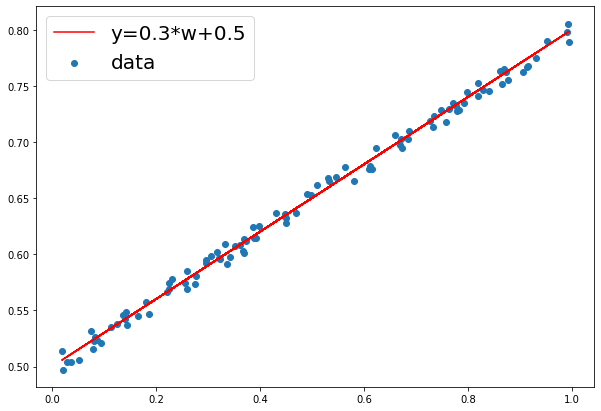

w:0.3, b:0.5


In [87]:
import numpy as np
import matplotlib.pyplot as plt

def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x=np.random.rand(size)
  y=w*x+b
  noise=np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy=y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r', label=f'y={w}*w+{b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x,yy

x,y=make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [88]:
num_epoch=1000
learning_rate=0.005
errors=[]
w=np.random.uniform(low=0.0, high=1.0)
b=np.random.uniform(low=0.0, high=1.0)
for epoch in range(num_epoch):
  y_hat=w*x+b
  error=0.5*((y_hat-y)**2).sum()
  if error<0.005:
    break
  w=w-learning_rate*((y_hat-y)*x).sum()
  b=b-learning_rate*(y_hat-y).sum()

  errors.append(error)

  if epoch%5==0:
    print("{0:2}w={1:5f},b={2:5f}error={3:5f}".format(epoch,w,b,error))

print("------"*15)
print("{0:2} w={1:1f}, b{2:1f} error={3:5f}".format(epoch,w,b,error))


 0w=0.807938,b=0.449194error=16.547537
 5w=0.657845,b=0.316114error=0.566575
10w=0.602729,b=0.343009error=0.407350
15w=0.556525,b=0.366857error=0.293464
20w=0.517346,b=0.387090error=0.211557
25w=0.484120,b=0.404249error=0.152651
30w=0.455942,b=0.418800error=0.110285
35w=0.432046,b=0.431141error=0.079816
40w=0.411781,b=0.441606error=0.057903
45w=0.394594,b=0.450481error=0.042143
50w=0.380020,b=0.458008error=0.030808
55w=0.367660,b=0.464391error=0.022657
60w=0.357178,b=0.469804error=0.016794
65w=0.348288,b=0.474394error=0.012577
70w=0.340750,b=0.478287error=0.009545
75w=0.334356,b=0.481589error=0.007364
80w=0.328935,b=0.484389error=0.005796
------------------------------------------------------------------------------------------
84 w=0.326085, b0.485860 error=0.004864


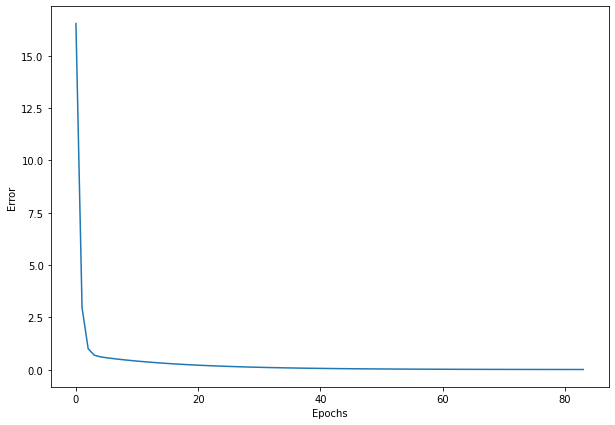

In [89]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

* 가중치가 난수 값에 의하여 다르게 초기화되기 때문에 매번 실행할 때마다 수렴하는 속도는 차이가 있음

### 2) 딥러닝 프로세스**

#### (1) 데이터 전처리
  * 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계
  * 전처리 단계에서 데이터셋의 형태나 차원을 미리 구상해야 다음 단계에서 모델을 설계할 때 입력한 데이터셋의 형태를 올바르게 정의할 수 있다.
  * 전처리 단계에서 처리한 데이터셋의 형태와 다음 단계에서 생성할 모델이 입력받을 데이터셋의 형태가 다르다면 에러가 발생할 수 있다.

#### (2) 모델 생성
  * 모델의 구조를 정의하고 생성하는 단계
  * 순차적인 구조의 모델 : Sequential API
  * 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델 : Functional API, Model Subclassing

#### (3) 모델 컴파일
  * 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의
  * 모델 인스턴스에 compile() 메소드를 적용하고, 여러가지 속성 값을 설정

#### (4) 모델 훈련
  * 모델을 훈련하는 단계
  * fit() 함수에 모델 훈련에 필요한 정보를 매개변수(파라미터)로 전달
  * 훈련 데이터셋, 검증 데이터셋, epoch, 배치크기 및 콜백 함수 등을 지정



#### (5) 모델 검증
  * 훈련이 완료된 모델을 검증
  * 훈련에 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산
  * 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델을 수정하고, 컴파일 및 훈련 과정을 거쳐 재평가 하는 과정을 목표 성능에 도달할 때까지 반복

#### (6) 모델 예측
  * 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환

## **2. 단순 신경망 훈련**

### 1) 선형 회귀

  * 회귀 분석 : 하나 이상의  독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법
  * 단순 선형 회귀 : 하나의 X가 하나의 Y에 미치는 영향을 추정

### 2) 뉴런
  * 인공 신경망 모델을 구성하는 하나의 신경
  * 노드
  * 신경망은 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨
  * 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트 됨
  * 역전파 알고리즘 : 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법. 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 그래디언트를  출력층에서 입력층 순으로 역으로 계산하고 저장함.

### 3) Dense 레이어

  * 심층 신경망 모델을 구성하는 가장 기본 레이어
  * 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 Fully connected Layer라고 부르기도 함
  * Dense 레이어를 구성하는 노드 개수와 활성화 함수를 지정할 수 있음
  * 텐서플로의 layer모듈에 있는 Dense 레이어로 쉽게 구현 가능

In [90]:
import tensorflow as tf

tf.keras.layers.Dense(10)
tf.keras.layers.Dense(10,activation='relu')

### 4) 데이터셋 만들기
  * 단순선형회귀 모형을 지도학습 방식으로 훈련

In [91]:
x=np.arange(1,6)

y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


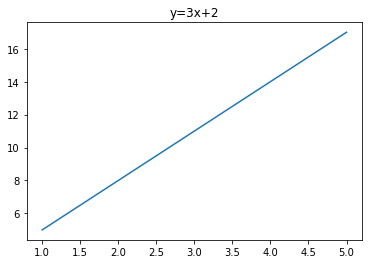

In [92]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

### 5) Sequential API
  * 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
  * 입력 레이어부터 출력 레이어까지 순서를 가짐
  * 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행
  * 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없음

#### (1) 모델 구조

  * 리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력
    * 대괄호 안에 쉼표로 구분하여 층을 쌓음

In [93]:
#Dense 레이어 3개를 갖는 모델을 생성
import tensorflow as tf

model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1) 
])

  * add 함수로 레이어 추가로 Sequential 클래스 객체를 먼저 만든 뒤에, 생성된 모델 인스턴스에 층을 추가
    * add() 메소드 함수를 사용하여 1개의 층을 추가
    * 여러 개의 층을 추가하기 위해서는 add함수를 반복

In [94]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### (2) 입력 데이터 형태
  * Sequential API를 사용하여 모델을 구성할 때 반드시 첫째 층은 input_shape 매개변수를 지정해야 함 => 주입할 데이터셋의 shape을 튜플 혹은 리스트로 지정

In [95]:
import tensorflow as tf
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

#### (3) 단순선형회귀 모델의 정의
  * 단순 선형 회귀 모델을 만들기 위해서는 1개읜 뉴런을 가지는 Dense 레이어 한개를 사용
  * 입력 데이터는 x값을 나타내는 입력변수 1개만 존재 

In [98]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

### 6) 모델 요약
  * model.summary()로 모델 요약 확인 가능
  * 모델의 구조 확인 가능, 층별 노드의 개수 표기, 업데이트할 파라미터의 개수 표기
  * Total params : 모델 내부에 존재하느 모든 파라미터의 합계
  * Trainable params : 모델 훈련 시 업데이트할 파라미터의 총 개수
  * Non-trainable params : 훈련 시 업데이트하지 않을 파라미터의 총 개수
  

### 7) 컴파일


  * 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 등을 정의함
  * 클래스 인스턴스로 지정
    * 학습률, 모멘텀 등의 하이퍼 파라미터를 사용자가 직접 지정
  * 문자열로 지정
    * 기본값으로 설정된 하이퍼 파라미터를 사용, 수정은 어려움

In [99]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

In [100]:
# 짧은 문자열 지정 
model.compile(optimizer='sgd',loss='mse', metrics=['mse','mae'])

In [101]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [102]:
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

### 8) 훈련
  * 생성한 모델 인스턴스에 fit()메소드를 적용
  * 훈련 : 가중치를 업데이트
  * fit()
    *  훈련용 데이터셋의 입력(x)와 정답에 해당하는 출력(y), 반복 훈련할 epoch 수를 지정
    * 매 epoch가 끝날 때마다 훈련 데이터셋에 대한 손실과 평가지표를 출력 (안하려면 verbos=0)
    * 검증 데이터셋 옵션을 지정했다면 검증 셋에 대한 손실과 평가지표도 함께 출력

In [103]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 264ms/step - loss: 114.6969 - mae: 10.0201
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 66.9419 - mae: 7.6953
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 39.1120 - mae: 5.9204
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 22.8934 - mae: 4.5653
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 13.4413 - mae: 3.5307


> 모델의 예측오차가 점점 줄어듦

> 반복 훈련 횟수가 충분하지 않아 학습이 덜 됨 (과소적합)

*  epoch에 120을 지정하여 충분히 훈련
* fit() 메소드가 반환하는 history 변수는 epoch 별 훈련 손실과 평가지표가 딕셔너리 형태로 저장됨

In [104]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

history=model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 927ms/step - loss: 123.1898 - mae: 10.3735
Epoch 2/1200
1/1 [==============================] - 0s 6ms/step - loss: 71.8859 - mae: 7.9638
Epoch 3/1200
1/1 [==============================] - 0s 8ms/step - loss: 41.9879 - mae: 6.1242
Epoch 4/1200
1/1 [==============================] - 0s 7ms/step - loss: 24.5642 - mae: 4.7197
Epoch 5/1200
1/1 [==============================] - 0s 7ms/step - loss: 14.4099 - mae: 3.6474
Epoch 6/1200
1/1 [==============================] - 0s 7ms/step - loss: 8.4918 - mae: 2.8287
Epoch 7/1200
1/1 [==============================] - 0s 5ms/step - loss: 5.0424 - mae: 2.2035
Epoch 8/1200
1/1 [==============================] - 0s 8ms/step - loss: 3.0316 - mae: 1.7262
Epoch 9/1200
1/1 [==============================] - 0s 8ms/step - loss: 1.8592 - mae: 1.3616
Epoch 10/1200
1/1 [==============================] - 0s 5ms/step - loss: 1.1753 - mae: 1.0831
Epoch 11/1200
1/1 [==============================] - 0s 5ms/

<function matplotlib.pyplot.show(*args, **kw)>

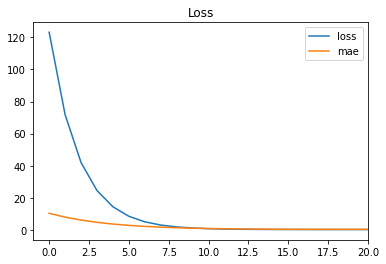

In [105]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show

### 9) 검증
  * evaluate() 메소드
  * 검증 데이터셋을 입력하여 검증

In [106]:
model.evaluate(x,y)

1/1 [==============================] - 0s 151ms/step - loss: 6.9756e-05 - mae: 0.0072


[6.975578435231e-05, 0.007168769836425781]

### 10) 예측
* 훈련이 완료된 모델 인스턴스의 predict() 메소드에 새로운 입력 데이터를 넣어주면 모델의 예측값을 얻을 수 있음

In [107]:
model.predict([10])

1/1 [==============================] - 0s 76ms/step


array([[32.03465]], dtype=float32)

## **3. 심층 신경망으로 이미지 분류**

* 딥러닝 모델


### 1) 케라스 내장 데이터셋 로드
  * load_data() > 케라스 내장 데이터셋 사용
    * 훈련 데이터셋과 검증 데이터셋을 구분하여 제공함

In [19]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist

In [20]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [21]:
print('train set:',x_train.shape, y_train.shape)
print('test set :',x_test.shape, y_test.shape)


train set: (60000, 28, 28) (60000,)
test set : (10000, 28, 28) (10000,)


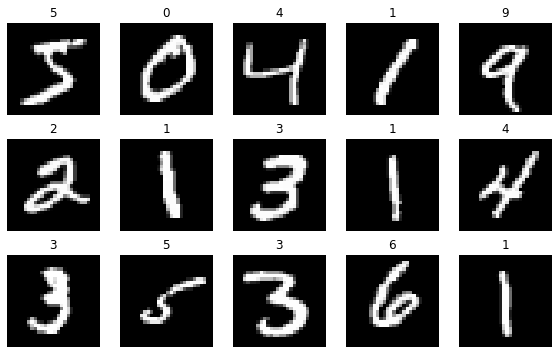

In [26]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(3,5)
fig.set_size_inches(8,5)
for i in range(15):
  ax=axes[i//5,i%5]
  ax.imshow(x_train[i],cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 2) 데이터 전처리 
  * 이미지 데이터에 대하여 정규화를 통해 데이터의 범위를 조절

In [27]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

* 0~255 범위
* 정규화

In [28]:
print(f'정규화전 ] 최소값: {x_train.min()}, 최대값:{x_train.max()}')

x_train=x_train/x_train.max()
print(f'정규화후 ] 최소값: {x_train.min()}, 최대값:{x_train.max()}')

정규화전 ] 최소값: 0, 최대값:255
정규화후 ] 최소값: 0.0, 최대값:1.0


In [29]:
x_test=x_test/x_test.max()

In [31]:
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3) Flatten 레이어

* 정규화를 하더라도 개별 데이터 값의 범위는 축소되지만, 원본 배열의 형태는 그대로 유지됨

* 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없음

* Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 함.

* 이미지 데이터를 1차원으로 전처리하여 주입

In [32]:
print(f'변경 전 shape : {x_train.shape}')
print(f'1d으로 변경 후 : {x_train.reshape(60000,-1).shape}')

변경 전 shape : (60000, 28, 28)
1d으로 변경 후 : (60000, 784)


* Flatten 레이어 사용

In [33]:
print(f'변경 전 shape : {x_train.shape}')

print(f'Flaten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape : (60000, 28, 28)
Flaten 적용 후 : (60000, 784)


### 4) 활성화 함수
  * 입력을 비선형 출력으로 변환해주는 함수
  * 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형함수로 표현됨.
  * 시그모이드, 하이퍼볼릭 탄젠트, ReLu, Leaky ReLu

* Dense 레이어에 ReLu 활성화 함수를 적용하기 위해서는 activation 매개변수에 relu 문자열을 대입하면 됨

In [34]:
tf.keras.layers.Dense(128, activation='relu')

* 별도의 층으로 적용하는 경우 Dense 레이어 다음에 배치 정규화를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용됨

In [36]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 5) 입력과 출력

* 딥러닝 모델을 만들 때는 첫번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적

* 분류 모델의 가장 마지막 레이어는 출력층
* 출력 층의 노드 개수는 반드시 분류해야 할 클래스의 갯수와 동일해야 함

In [38]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(10,activation='softmax')
])

* 다중 분류 문제는 softmax 활성화 함수를 적용
* 이중 분류 문제는 sigmoid 활성화 함수를 적용

In [40]:
tf.keras.layers.Dense(1,activation='sigmoid')
tf.keras.layers.Dense(10, activation='softmax')

### 6) 손실함수
  * 분류 모델의 손실함수는 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련 가능
  * 이진분류 => binary_crossentropy
  * 다중분류 => categorical_crossentropy,
  * 출력벡터가 원핫 벡터 =>  sparse_categorical_crossentropy



In [41]:
model.compile(loss='binary_corssentropy')

model.compile(loss='categorical_crossentropy')
model.compile(loss='sparse_categorical_crossentropy')

### 7) 옵티마이저

* 손실을 낮추기 위해서 신경망의 가중치와 학습률과 같은 속성을 변경하는 데 사용되는 최적화 방법
  * Adam, SGD, Adagrad, Nadam, RMSprop, Adadelta, Ftrl
* 옵티마이저는 클래스 인스턴스로 지정하거나 문자열로 지정

In [84]:
adam=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 8) 평가지표

* 분류모델 : accuracy, auc, precision, recall
* 모델 컴파일 단계에서 metrics 매개변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고 가능
* 클래스 인스턴스로 지정하거나 문자열로 지정

In [45]:
acc=tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[acc])

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 9) 훈련
* 모델을 훈련할 때 검증 셋을 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 각 셋에 대한 평가 지표를 나란히 출력
* validation_data 매개변수에 투플 형식의 검증셋을 지정

In [48]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2247 - accuracy: 0.9335 - val_loss: 0.1234 - val_accuracy: 0.9619
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0921 - accuracy: 0.9717 - val_loss: 0.0774 - val_accuracy: 0.9770
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0636 - accuracy: 0.9796 - val_loss: 0.0938 - val_accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0501 - accuracy: 0.9843 - val_loss: 0.0743 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.0679 - val_accuracy: 0.9794
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0325 - accuracy: 0.9899 - val_loss: 0.0759 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0856 - val_accuracy:

### 10) 평가
* 훈련 종료 후 evaluate() 메소드로 모델 성능을 검증하고 평가 결과를 확인할 수 있음

In [49]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1016 - accuracy: 0.9744
검증 셋 정확도: 0.974399983882904


### 11) 예측

* 훈련된 모델로 새로운 이미지에 대한 분류 값을 예측하는 작업 수행
* predict()

In [50]:
predictions=model.predict(x_test)

predictions[0]

313/313 [==============================] - 0s 1ms/step


array([1.6312729e-11, 1.2676436e-07, 2.6303347e-08, 1.9938478e-09,
       2.0380846e-09, 5.4323296e-10, 1.4436973e-13, 9.9999982e-01,
       3.0499951e-09, 2.9167456e-08], dtype=float32)

* softmax 활성화 함수를 거친 10개의 출력 값은 순차적으로 0~9까지의 10개의 개별 클래스에 대한 분류 확률 값을 나탸냄
* 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스

In [51]:
import numpy as np

print(np.argmax(predictions[0]))
print(np.argmax(predictions[:10],axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


* 시각화 코드

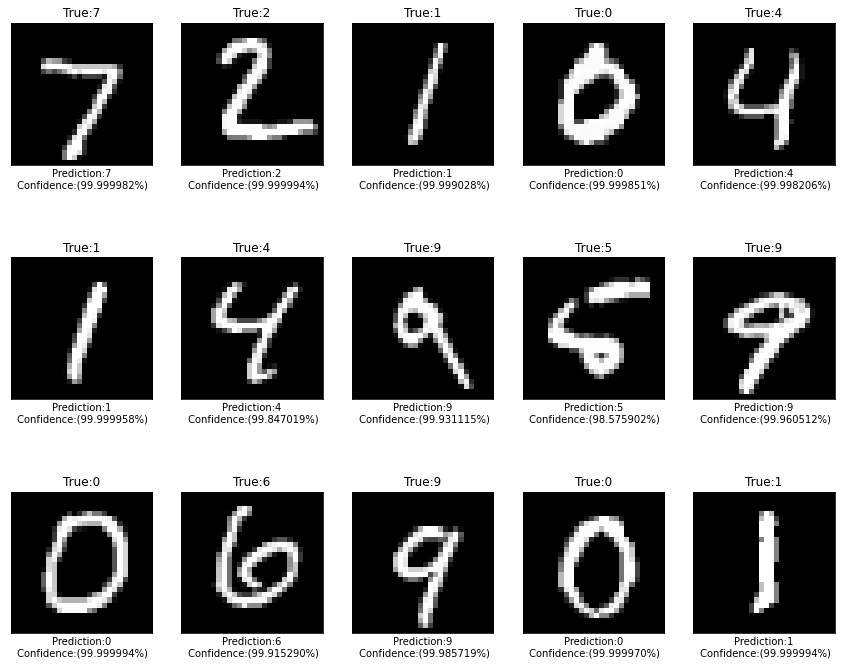

In [53]:
import matplotlib.pyplot as plt

def get_one_result(idx):
  img, y_true, y_pred, confidence=x_test[idx],y_test[idx],np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

fig,axes=plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax=axes[i//5,i%5]
  img,y_true, y_pred, confidence=get_one_result(i)
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True:{y_true}')
  ax.set_xlabel(f'Prediction:{y_pred}\n Confidence:({confidence:2f}%)')
plt.tight_layout()
plt.show()

## **4. 모델 세부 설정**

In [54]:
import tensorflow as tf

mnist=tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

print('train set:', x_train.shape, y_train.shape)
print('test set: ',x_test.shape, y_test.shape)

x_train=x_train/x_train.max()
x_test=x_test/x_test.max()

train set: (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


### 1) 초기값 설정

* Dense 레이어는 기본 초기화 방법으로 Glorot Uniform 초기화

In [55]:
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']



{'class_name': 'GlorotUniform', 'config': {'seed': None}}

* 초기화 방법 변경 : kernel_initializer 매개변수 설정

In [61]:
#문자열 초기화
dense=tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

#클래스 인스턴스 초기화
he_normal=tf.keras.initializers.HeNormal()
dense=tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


### 2) 규제(Regularization)

* 모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용
* 텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않음


In [83]:
#기본값
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_33',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

* 모델을 구성하는 레이어마다 규제를 적용할 수 있음

In [62]:
#L1규제 적용
dense=tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha=0.1변경
regularizer=tf.keras.regularizers.l1(l1=0.1)
dense=tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


### 3) 드롭아웃
* 딥러닝 모델의 가장 큰 난제 : 과대적합
* 과대적합 문제를 해결하기 위해 노드 일부의 신호를 임의로 삭제 > 모델이 학습하는 가중치 파라미터의 개수가 현저히 줄어들게 됨

* 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, 예측할 때는 모든 노드들이 활용됨

* Dropout 레이어 함수에 입력하는 숫자는 노드에서 제거되는 비율을 의미

In [63]:
tf.keras.layers.Dropout(0.25)

### 4) 배치 정규화
* 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화 함
  * 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 향상시킬 수 있음

* 케라스에서는 클래스 인스턴스를 생성해 추가해주면 됨

In [65]:
model_a=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_a.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                50240     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_b=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_b.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

> 배치 정규화만 추가하였도 안정적이고 빠르게 수렴함

### 5) 활성화 함수

* 클래스 인스턴스로 선언하여 하이퍼파라미터 값을 변경하여 적용할 수 있음

In [76]:
tf.keras.layers.LeakyReLU()

tf.keras.layers.LeakyReLU(alpha=0.2)

In [75]:
model_c=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_c.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                      

* model a,b,c 총3개의 모델을 동일한 조건으로 10번의 epoch 동안 훈련한 후에 수렴 속도를 확인

In [77]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_a=model_a.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)
history_b=model_b.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)
history_c=model_c.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2850 - accuracy: 0.9193 - val_loss: 0.1542 - val_accuracy: 0.9554
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1310 - accuracy: 0.9615 - val_loss: 0.1087 - val_accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0958 - accuracy: 0.9713 - val_loss: 0.1032 - val_accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0763 - accuracy: 0.9769 - val_loss: 0.0888 - val_accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0621 - accuracy: 0.9805 - val_loss: 0.0870 - val_accuracy: 0.9743
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9839 - val_loss: 0.0952 - val_accuracy: 0.9723
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0855 - val_accuracy:

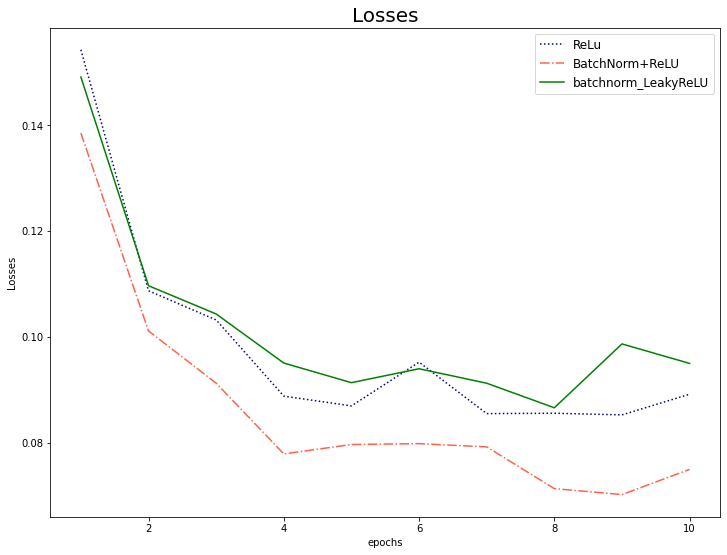

In [81]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses',fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLu','BatchNorm+ReLU','batchnorm_LeakyReLU'],fontsize=12)
plt.show()